In [40]:
# https://www.youtube.com/watch?v=sVeFZzsRdvs
import os
os.getcwd()

'/Users/roger-that/Documents/Codes/Python/11_Scripts/image-extractor'

In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mimg

In [42]:
cv2_img = cv2.imread('apple.jpeg')
cv2.imshow('Apple', cv2_img)
cv2.waitKey(0)

27

In [43]:
cv2_img_grey = cv2.imread('apple.jpeg', 0)
cv2.imshow('Apple Grey', cv2_img_grey)
cv2.waitKey(0)

27

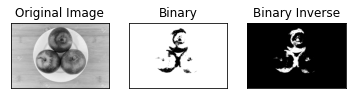

In [44]:
ret, threshold = cv2.threshold(cv2_img_grey, 70, 155, cv2.THRESH_BINARY)
ret1, threshold1 = cv2.threshold(cv2_img_grey, 70, 155, cv2.THRESH_BINARY_INV)

titles = ['Original Image', 'Binary', 'Binary Inverse']
images = [cv2_img_grey, threshold, threshold1]

for i in range(3):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [45]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [46]:
largest_areas = sorted(contours, key=cv2.contourArea)

In [47]:
mask = np.zeros(cv2_img_grey.shape, np.uint8)

In [48]:
img_contour = cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255), -1)

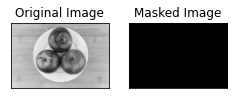

In [49]:
titles = ['Original Image', 'Masked Image']
images = [cv2_img_grey, img_contour]

for i in range(2):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [50]:
adapt_treshold = cv2.adaptiveThreshold(cv2_img_grey, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

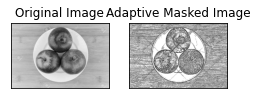

In [51]:
titles = ['Original Image', 'Adaptive Masked Image']
images = [cv2_img_grey, adapt_treshold]

for i in range(2):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [52]:
contours, hierarchy = cv2.findContours(adapt_treshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [53]:
largest_areas = sorted(contours, key=cv2.contourArea)

In [54]:
mask = np.zeros(cv2_img_grey.shape, np.uint8)

In [55]:
img_contour = cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255), -1)

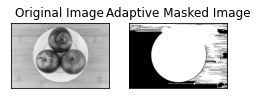

In [56]:
titles = ['Original Image', 'Adaptive Masked Image']
images = [cv2_img_grey, img_contour]

for i in range(2):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

(([], []), ([], []))

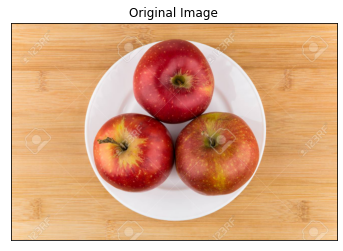

In [57]:
plt_img = mimg.imread('apple.jpeg')
plt.plot()
plt.imshow(plt_img)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

In [58]:
img_bitcontour = cv2.bitwise_or(plt_img, plt_img, mask=mask)

In [59]:
hsv_img = cv2.cvtColor(img_bitcontour, cv2.COLOR_BGR2HSV)

In [60]:
mask_plate = cv2.inRange(hsv_img, np.array([0,0,50]), np.array([200, 90, 250]))

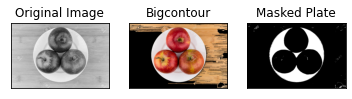

In [61]:
titles = ['Original Image', 'Bigcontour', 'Masked Plate']
images = [cv2_img_grey, img_bitcontour, mask_plate]

for i in range(3):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [62]:
mask_not_plate = cv2.bitwise_not(mask_plate)
mask_fruit_finger = cv2.bitwise_and(img_bitcontour, img_bitcontour, mask=mask_not_plate)

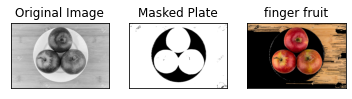

In [63]:
titles = ['Original Image', 'Masked Plate', 'finger fruit']
images = [cv2_img_grey, mask_not_plate, mask_fruit_finger]

for i in range(3):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [64]:
hsv_img = cv2.cvtColor(mask_fruit_finger, cv2.COLOR_BGR2HSV)
skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([20, 150, 255]))
not_skin = cv2.bitwise_not(skin)

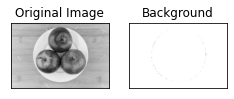

In [65]:
titles = ['Original Image', 'Background']
images = [cv2_img_grey, not_skin]

for i in range(2):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [66]:
fruit = cv2.bitwise_and(mask_fruit_finger, mask_fruit_finger, mask=not_skin)
fruit_bw = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
fruit_finger = cv2.inRange(fruit_bw, 10, 255)

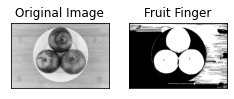

In [67]:
titles = ['Original Image', 'Fruit Finger']
images = [cv2_img_grey, fruit_finger]

for i in range(2):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [68]:
img_th = cv2.adaptiveThreshold(fruit_finger, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [69]:
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [70]:
mask_fruit = np.zeros(fruit_finger.shape, np.uint8)
largest_areas = sorted(contours, key=cv2.contourArea)

In [71]:
masked_fruit = cv2.drawContours(mask_fruit, [largest_areas[-2]], 0, (255,255,255), -1)

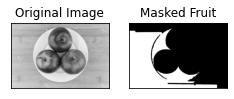

In [72]:
titles = ['Original Image', 'Masked Fruit']
images = [cv2_img_grey, masked_fruit]

for i in range(2):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [73]:
fruit_final = cv2.bitwise_and(plt_img, plt_img, mask=masked_fruit)

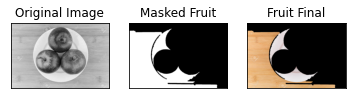

In [74]:
titles = ['Original Image', 'Masked Fruit', 'Fruit Final']
images = [cv2_img_grey, masked_fruit, fruit_final]

for i in range(3):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])